#Deepfake Detection Model

##Importing Necessary Libraries

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, load_model
import cv2
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

##Loading Data

In [3]:
# Paths to datasets
train_dir = 'D:\\minor_project2\\archive (4)\\1000_videos\\train'
val_dir = 'D:\\minor_project2\\archive (4)\\1000_videos\\validation'
test_dir = 'D:\\minor_project2\\archive (4)\\1000_videos\\test'

##Counting images in each class

In [4]:
def count_images_per_class(directory):
  """Counts the number of images in each class within a directory.

  Args:
    directory: The path to the directory containing the class subdirectories.

  Returns:
    A dictionary where keys are class names and values are the number of images
    in each class.
  """

  class_counts = {}
  for class_name in os.listdir(directory):
    class_dir = os.path.join(directory, class_name)
    if os.path.isdir(class_dir):
      image_count = sum(1 for filename in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, filename)))
      class_counts[class_name] = image_count
  return class_counts


# Count images in each directory
train_counts = count_images_per_class(train_dir)
val_counts = count_images_per_class(val_dir)
test_counts = count_images_per_class(test_dir)


# Print the results
print("Training Set:")
for class_name, count in train_counts.items():
    print(f"  {class_name}: {count} images")

print("\nValidation Set:")
for class_name, count in val_counts.items():
    print(f"  {class_name}: {count} images")

print("\nTest Set:")
for class_name, count in test_counts.items():
    print(f"  {class_name}: {count} images")


Training Set:
  fake: 6028 images
  real: 5605 images

Validation Set:
  fake: 1200 images
  real: 1200 images

Test Set:
  fake: 1200 images
  real: 1200 images


##Data Preprocessing and Augmentation

In [5]:
IMG_SIZE = 256
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=0.2
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 11633 images belonging to 2 classes.
Found 2400 images belonging to 2 classes.
Found 2400 images belonging to 2 classes.


In [ ]:
# Image Parameters
IMG_SIZE = 256  # MesoNet uses 256x256
BATCH_SIZE = 32

# Data Preprocessing & Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=0.2
)
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 11633 images belonging to 2 classes.
Found 2400 images belonging to 2 classes.
Found 2400 images belonging to 2 classes.


##MesoNet

In [ ]:
# Define MesoNet Model
def MesoNet():
    model = tf.keras.Sequential()

    # Convolution Blocks
    model.add(Conv2D(8, (3,3), padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(8, (5,5), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(16, (5,5), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(16, (5,5), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(4,4)))

    # Fully Connected Layers
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Binary Classification

    return model

# Load Pretrained MesoNet (if available)
pretrained_model_path = "mesonet_pretrained.h5"
if os.path.exists(pretrained_model_path):
    print("Loading Pretrained MesoNet Model...")
    model = load_model(pretrained_model_path)
else:
    print("No Pretrained Model Found! Training from Scratch...")
    model = MesoNet()

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator)
)

No Pretrained Model Found! Training from Scratch...


C:\Users\Shraiy\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10


C:\Users\Shraiy\AppData\Roaming\Python\Python39\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


364/364 ━━━━━━━━━━━━━━━━━━━━ 429s 1s/step - accuracy: 0.5833 - loss: 0.7201 - val_accuracy: 0.5063 - val_loss: 0.8035
Epoch 2/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/10


c:\Users\Shraiy\anaconda3\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


364/364 ━━━━━━━━━━━━━━━━━━━━ 437s 1s/step - accuracy: 0.7023 - loss: 0.5559 - val_accuracy: 0.7017 - val_loss: 0.6059
Epoch 4/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 80us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 211s 575ms/step - accuracy: 0.7503 - loss: 0.5028 - val_accuracy: 0.8004 - val_loss: 0.4111
Epoch 6/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 88us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 1013s 3s/step - accuracy: 0.7868 - loss: 0.4636 - val_accuracy: 0.8342 - val_loss: 0.3732
Epoch 8/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 46us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 10102s 28s/step - accuracy: 0.8058 - loss: 0.4295 - val_accuracy: 0.7517 - val_loss: 0.4986
Epoch 10/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step

##Saving the model

In [ ]:
# Save the trained model
model.save('mesonet_deepfake_detector.h5')

##Evaluating Results

75/75 ━━━━━━━━━━━━━━━━━━━━ 9228s 125s/step - accuracy: 0.8312 - loss: 0.3800
MesoNet Test Accuracy: 0.7471
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step


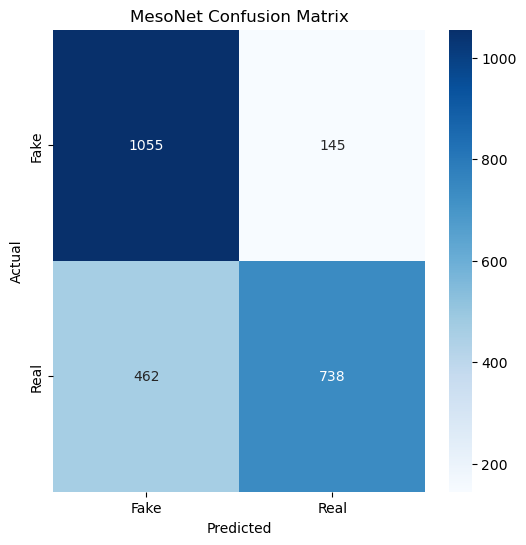

MesoNet Classification Report:
              precision    recall  f1-score   support

        Fake       0.70      0.88      0.78      1200
        Real       0.84      0.61      0.71      1200

    accuracy                           0.75      2400
   macro avg       0.77      0.75      0.74      2400
weighted avg       0.77      0.75      0.74      2400



In [ ]:
# Evaluate Model on Test Data
test_loss, test_acc = model.evaluate(test_generator)
print(f"MesoNet Test Accuracy: {test_acc:.4f}")

# Confusion Matrix & Classification Report
y_true = test_generator.classes
y_pred = (model.predict(test_generator) > 0.5).astype("int32")

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('MesoNet Confusion Matrix')
plt.show()

print("MesoNet Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Fake', 'Real']))

##Learning Curve

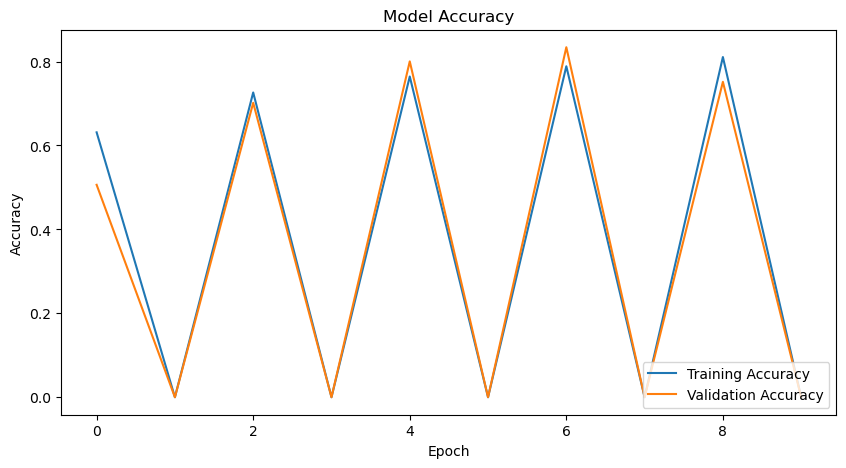

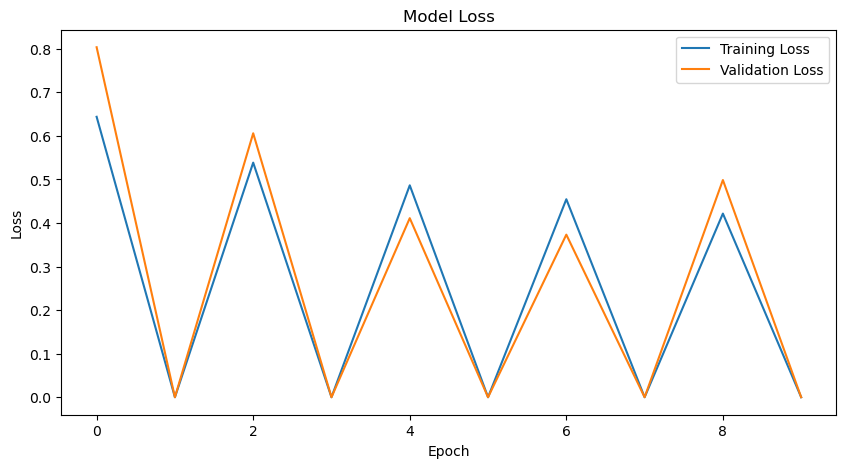

: 

In [ ]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


##Efficient Net

In [ ]:
# Save the trained model
model_efficient_net.save('efficientnetb6_deepfake_detector.h5')

##Evaluating the model Results

In [ ]:
# Evaluate Model on Test Data
test_loss, test_acc = model_efficient_net.evaluate(test_generator)
print(f"EfficientNetB6 Test Accuracy: {test_acc:.4f}")

# Confusion Matrix & Classification Report
y_true = test_generator.classes
y_pred_efficient_net = (model_efficient_net.predict(test_generator) > 0.5).astype("int32")

cm = confusion_matrix(y_true, y_pred_efficient_net)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('EfficientNetB6 Confusion Matrix')
plt.show()

print("EfficientNetB6 Classification Report:")
print(classification_report(y_true, y_pred_efficient_net, target_names=['Fake', 'Real']))